# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [161]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...

# Reading in the Nobel Prize data


# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

nobel = pd.read_csv('nobel.csv')
nobel.head()



,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


From my code I was able to show the data from the csv file and this are the first five rows with all the columns.

In [252]:
nobel.isnull().sum().sum()

1912

Here I am printing out the sum of all the missing data in my dataFrame.

In [253]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


Here was one of the steps I used in order to did the total number of the mising values

In [254]:
nobel.count()

year                    911
category                911
prize                   911
motivation              823
prize_share             911
laureate_id             911
laureate_type           911
full_name               911
birth_date              883
birth_city              883
birth_country           885
sex                     885
organization_name       665
organization_city       667
organization_country    667
death_date              593
death_city              576
death_country           582
dtype: int64

And here I displayed this because I wanted to see the the count of avaliable data in each columns.

In [257]:
len(nobel)

911

Here I am displaying the length of my panda which it has 911 rows.

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [258]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
nobel['prize_share'].value_counts()

1/1    344
1/2    306
1/3    201
1/4     60
Name: prize_share, dtype: int64

This output is displaying the prizes that were shared and not shared. And its showing that how many people shared the prize if it was shared and their totals.

In [259]:
# Display the number of prizes won by male and female recipients.
nobel['sex'].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

Here this output displays the totals of each male and female who won nobel prize.

In [260]:
# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)


United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

This one is showing the top ten nations due to the people who were in those nations and have won the nobel prize.

Which countries win most often?

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [261]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == "United States of America"
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index =False)["usa_born_winner"].mean()
# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


Here I am only displaying the decades and the proportion of USA born winners per decade in a table form

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

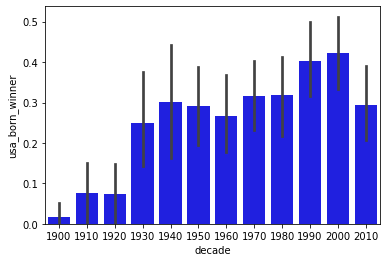

In [262]:
#using seaborn, plot the proportion of US winners by decade
sns.barplot(x = 'decade', y = 'usa_born_winner', data = nobel, color = 'blue')

Here I have taken the data from the table above and plotted it into a graph. In this graph the proportion statred to rise between 1990 and 2000 decades which means during that time more people received the nobel prize.

What can you conclude from the graph?

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

In [263]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == "Female"
prop_female_winners = nobel.groupby("decade", as_index =False)["female_winner"].mean()

prop_female_winners

,decade,female_winner
0,1900,0.052632
1,1910,0.025000
2,1920,0.037037
3,1930,0.053571
4,1940,0.069767
5,1950,0.000000
6,1960,0.037975
7,1970,0.038462
8,1980,0.041237
9,1990,0.067308


Here I am only displaying the decades and the proportion of female winners per decade in a table form.

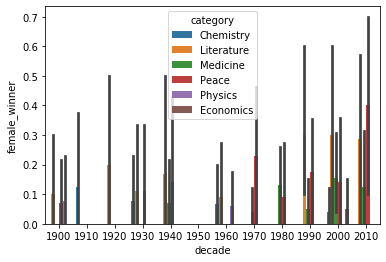

In [264]:
# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...
sns.barplot(x = 'decade', y = 'female_winner', hue = 'category', data = nobel)

Here I have taken the data from the table above and plotted it into a graph. From the graph the proportion of the female winners is rising meaning as time goes by more women are receiving nobel prize.



```
# This is formatted as code
```

 Interpret your plot here

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [265]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...
first_woman = nobel[(nobel['sex'] == "Female")]
first_woman.head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


Here I am only diplaying the firth lady who won a nobel prize on the physics category and it was 2 years after the nobel prizes thing was started.

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [266]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
multiple_winners = pd.DataFrame(nobel['full_name'])
dup = multiple_winners[multiple_winners.duplicated()]
dup


,full_name
62,"Marie Curie, née Sklodowska"
215,Comité international de la Croix Rouge (Intern...
340,Linus Carl Pauling
348,Comité international de la Croix Rouge (Intern...
424,John Bardeen
505,Frederick Sanger
523,Office of the United Nations High Commissioner...


Here I am displaying the winners who received the nobel prize more than 1.

In [267]:
multiple_winners.duplicated().sum()

7

Here its the total of the winners that won nobel prize twice or more.





How many people have received 2 or more prizes?

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [268]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# What is the mean age of winners and it's standard devation? What is the median age?
mean = nobel.age.mean()
std = nobel.age.std()
med = nobel.age.median()
print("Mean: " + str(mean) + "\nStandard dev: " + str(std) + "\nMedian: " + str(med))

Mean: 59.453001132502834
Standard dev: 12.39929042786365
Median: 60.0


## 9. Age differences between prize categories


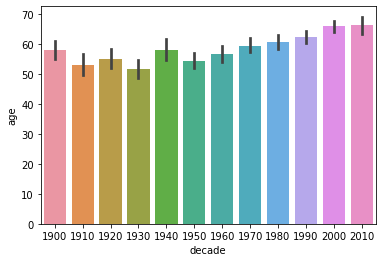

In [269]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...
sns.barplot(x = 'decade', y = 'age', data = nobel)

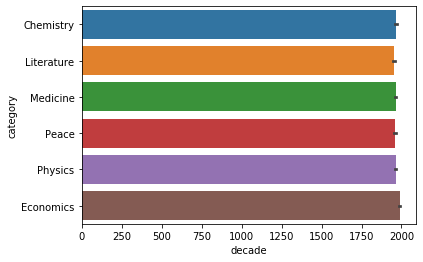

In [270]:
# Plot the age of nobel candidates by decade and prize category
sns.barplot(x = 'decade', y = 'category', data = nobel)

What can you conclude about the age at which people win different types of Nobel Prizes?

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [273]:
oldest = nobel['age'].max()
youngest = nobel['age'].min()
print("The oldest: " + str(oldest) + "\nThe youngset: " + str(youngest))

The oldest: 90.0
The youngset: 17.0


## Congratulations! You've reached the end of the challenge!